## Load Packages

In [1]:
suppressPackageStartupMessages(suppressWarnings(library('ggplot2')))
suppressPackageStartupMessages(suppressWarnings(library('DESeq2')))
suppressPackageStartupMessages(suppressWarnings(library('viridis')))
suppressPackageStartupMessages(suppressWarnings(library('clusterProfiler')))
suppressPackageStartupMessages(suppressWarnings(library('limma')))
suppressPackageStartupMessages(suppressWarnings(library('ggVennDiagram')))
suppressPackageStartupMessages(suppressWarnings(library('pheatmap')))

## Set work dir

In [2]:
setwd('C:/Users/1010/Desktop/Data_ReadsCount/')

## Read the expresion matrix

In [3]:
readcount <- read.csv('readcount.csv')
rownames(readcount) <- readcount$X
readcount <- readcount[,-1]
head(readcount)
SymbolList <- bitr(rownames(readcount),fromType = 'ENSEMBL', toType = 'SYMBOL','org.Hs.eg.db',drop=F)
readcount$ENSEMBL <- rownames(readcount)
SymbolMatrix <- merge(readcount,SymbolList,by='ENSEMBL')     
SymbolMatrix <- avereps(SymbolMatrix[,-length(rownames(SymbolMatrix))],ID=SymbolMatrix$SYMBOL)
SymbolMatrix <- as.data.frame(SymbolMatrix,stringsAsFactors = FALSE)
# length(SymbolMatrix)
SymbolMatrix <- na.omit(SymbolMatrix)
rownames(SymbolMatrix) <- SymbolMatrix$SYMBOL
# head(SymbolMatrix)
SymbolMatrix <- SymbolMatrix[,-length(colnames(SymbolMatrix))]
SymbolMatrix <- SymbolMatrix[,-1]
# SymbolMatrix$Symbol <- rownames(SymbolMatrix)
head(SymbolMatrix)
SymbolMatrixNu<-apply(SymbolMatrix,2,as.numeric)
SymbolMatrixNu<-as.data.frame(SymbolMatrixNu)
rownames(SymbolMatrixNu) <- rownames(SymbolMatrix)

,STM1,STM2,ST481,ST482,TSM1,TSM2,TS481,TS482,EVTM481,EVTM482,EVTV481,EVTV482
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,1406,1234,1420,1312,1971,1736,2077,1990,1230,1235,946,1295
ENSG00000000005,6,0,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,3014,3176,3296,3076,6231,5550,2396,2192,4085,4226,3621,4545
ENSG00000000457,611,552,655,599,675,539,1568,1667,807,813,766,702
ENSG00000000460,266,334,366,356,856,845,1644,1713,632,606,496,528
ENSG00000000938,4,0,8,1,0,1,22,20,4,3,0,4




'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(readcount), fromType = "ENSEMBL", toType = "SYMBOL", :
"40.11% of input gene IDs are fail to map..."


,STM1,STM2,ST481,ST482,TSM1,TSM2,TS481,TS482,EVTM481,EVTM482,EVTV481,EVTV482
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TSPAN6,1406,1234,1420,1312,1971,1736,2077,1990,1230,1235,946,1295
TNMD,6,0,0,0,0,0,0,0,0,0,0,0
DPM1,3014,3176,3296,3076,6231,5550,2396,2192,4085,4226,3621,4545
SCYL3,611,552,655,599,675,539,1568,1667,807,813,766,702
C1orf112,266,334,366,356,856,845,1644,1713,632,606,496,528
FGR,4,0,8,1,0,1,22,20,4,3,0,4


## Counstruct the analysis matrix

In [4]:
mycounts <- SymbolMatrixNu

condition <- factor(c(rep("STM",2),rep("ST48",2),rep("TSM",2),rep("TS48",2),rep("EVTM",2),rep("EVTV48",2)), 
                    levels = c("STM","ST48","TSM","TS48","EVTM","EVTV48"))
colData <- data.frame(row.names=colnames(mycounts), condition)
colData

,condition
,<fct>
STM1,STM
STM2,STM
ST481,ST48
ST482,ST48
TSM1,TSM
TSM2,TSM
TS481,TS48
TS482,TS48
EVTM481,EVTM


## Analysis DEG

In [5]:
dds_new <- DESeqDataSetFromMatrix(mycounts, colData, design= ~ condition)
dds_new <- DESeq(dds_new)
dds_new

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



class: DESeqDataSet 
dim: 36431 12 
metadata(1): version
assays(4): counts mu H cooks
rownames(36431): TSPAN6 TNMD ... LOC105377063 F8A1
rowData names(38): baseMean baseVar ... deviance maxCooks
colnames(12): STM1 STM2 ... EVTV481 EVTV482
colData names(2): condition sizeFactor

## Set samples for analysis

In [6]:
control <- 'TSM'
analysis_samples <- c("TS48")

# control <- 'STM'
# analysis_samples <- c("ST48")

# control <- 'EVTM'
# analysis_samples <- c("EVTV48")

## Find different expression genes

In [7]:
selectlist <- read.csv('filtered_list.csv',header = F)$V1

for (i in analysis_samples){
  
  res_new = results(dds_new, contrast=c("condition", i, control))
  res_new_TS = res_new[order(res_new$pvalue),]
  
  #select genes with padj<0.05, foldchange>1 and baseMean >100
  diff_gene_deseq2 <-subset(res_new_TS, padj < 0.05 & abs(log2FoldChange) > 2 & baseMean>100)
}

plotMatrix_merge_TS <- diff_gene_deseq2[na.omit(match(selectlist,rownames(diff_gene_deseq2))),]

rownames(plotMatrix_merge_TS)


[1] "APOBEC3G" "APOL1"    "APOL6"    "ATF3"     "BST2"     "CSRNP1"  
 [7] "DDIT4"    "DDX60"    "DTX3L"    "EPSTI1"   "FUT4"     "GBP3"    
[13] "GEM"      "HEG1"     "HELZ2"    "HSH2D"    "IFI35"    "IFIH1"   
[19] "IFIT1"    "IFIT2"    "IFIT3"    "IFITM1"   "IFNLR1"   "IL15"    
[25] "IRF1"     "IRF2"     "ISG15"    "ISG20"    "JUNB"     "LAMP3"   
[31] "MAFF"     "MAP3K14"  "MARCKS"   "MX1"      "MX2"      "NOS2"    
[37] "NPAS2"    "OAS1"     "OAS2"     "OAS3"     "OASL"     "P2RY6"   
[43] "PARP12"   "PLSCR1"   "RNF213"   "RSAD2"    "SERPINE1" "SLC15A3" 
[49] "SP110"    "STEAP4"   "TNFAIP3"  "TNFSF10"  "USP18"

In [8]:
control <- 'STM'
analysis_samples <- c("ST48")

In [9]:
for (i in analysis_samples){
  
  res_new = results(dds_new, contrast=c("condition", i, control))
  res_new_STB = res_new[order(res_new$pvalue),]
  
  #select genes with padj<0.05, foldchange>1 and baseMean >100
  diff_gene_deseq2 <-subset(res_new_STB, padj < 0.05 & abs(log2FoldChange) > 1 & baseMean>100)
}

plotMatrix_merge_STB <- diff_gene_deseq2[na.omit(match(selectlist,rownames(diff_gene_deseq2))),]

rownames(plotMatrix_merge_STB)

[1] "APOL1"   "APOL2"   "APOL6"   "BST2"    "CEACAM1" "CYP1B1"  "DDX60"  
 [8] "DTX3L"   "EIF2AK2" "EPSTI1"  "FLT1"    "HELZ2"   "HERC6"   "IFIH1"  
[15] "IFIT1"   "IFIT2"   "IFIT3"   "IFIT5"   "IFITM1"  "IRF1"    "ISG15"  
[22] "MX1"     "OAS1"    "OAS2"    "OAS3"    "OASL"    "PARP12"  "PLSCR1" 
[29] "SP110"   "STAT1"   "USP18"   "ZC3HAV1"

In [10]:
control <- 'EVTM'
analysis_samples <- c("EVTV48")

In [11]:
for (i in analysis_samples){
  
  res_new = results(dds_new, contrast=c("condition", i, control))
  res_new_EVT = res_new[order(res_new$pvalue),]
  
  #select genes with padj<0.05, foldchange>1 and baseMean >100
  diff_gene_deseq2 <-subset(res_new_EVT, padj < 0.05 & abs(log2FoldChange) > 1 & baseMean>100)
}

plotMatrix_merge_EVT <- diff_gene_deseq2[na.omit(match(selectlist,rownames(diff_gene_deseq2))),]

rownames(plotMatrix_merge_EVT)

[1] "EPSTI1" "IFIH1"  "IFIT1"  "IFIT2"  "IFIT3"  "MX1"    "OAS1"   "OAS2"  
[9] "OASL"

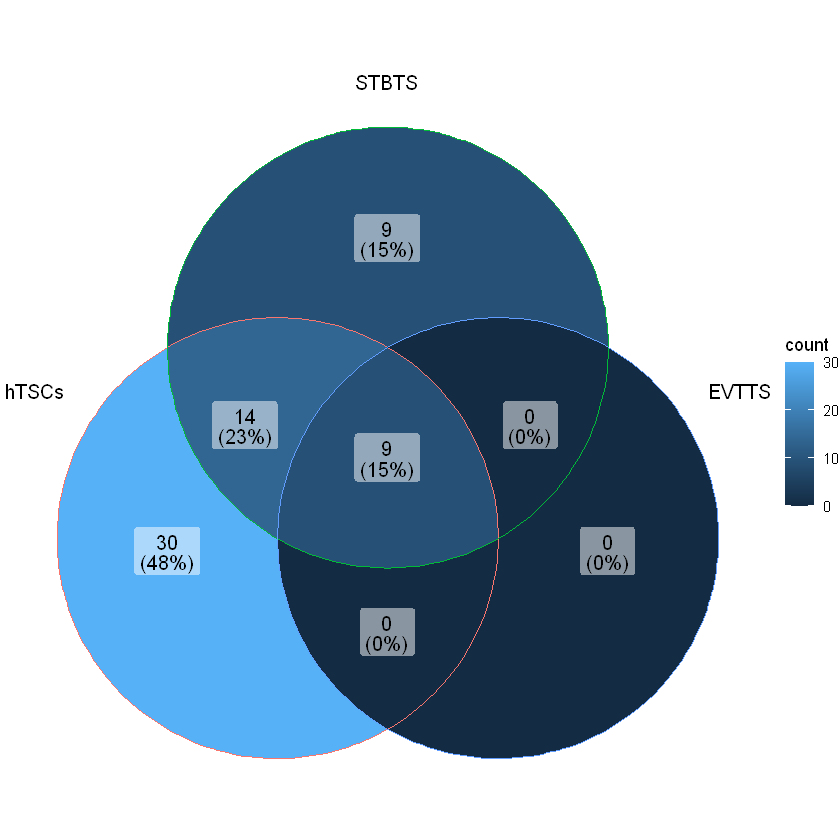

In [12]:
TSgene <- rownames(plotMatrix_merge_TS)
STBgene <- rownames(plotMatrix_merge_STB)
EVTgene <- rownames(plotMatrix_merge_EVT)

plotList_infection <- list("hTSCs"=TSgene,"STBTS"=STBgene,"EVTTS"=EVTgene)
p <- ggVennDiagram(plotList_infection,label = c('both'))
p

In [13]:
expList <- read.csv('ISG_list.csv',header = F)$V1

TSExp <- res_new_TS[rownames(res_new_TS)%in%expList,]
TSFoldChange <- subset(TSExp,select=log2FoldChange)
TSFoldChange$Name <- rownames(TSFoldChange)
STBExp <- res_new_STB[rownames(res_new_STB)%in%expList,]
STBFoldChange <- subset(STBExp,select=log2FoldChange)
STBFoldChange$Name <- rownames(STBFoldChange)
EVTExp <- res_new_EVT[rownames(res_new_EVT)%in%expList,]
EVTFoldChange <- subset(EVTExp,select=log2FoldChange)
EVTFoldChange$Name <- rownames(EVTFoldChange)

plotfoldChange <- merge(merge(as.data.frame(TSFoldChange),as.data.frame(STBFoldChange),by='Name'),as.data.frame(EVTFoldChange),by='Name')
rownames(plotfoldChange) <- plotfoldChange$Name
plotfoldChange <- plotfoldChange[,-1]


sorted_indices <- match(expList,rownames(plotfoldChange))
plotfoldChange <- plotfoldChange[sorted_indices, ]
colnames(plotfoldChange) <- c('hTSCs','STBTS','EVTTS')

# p <- pheatmap(plotMatrix_foldChange_test, scale = 'none',show_rownames = T,cluster_cols = F, cluster_rows = F, color = colorRampPalette(c("Navy", "white", "Firebrick3"),bias = 3)(50))

In [14]:
plotfoldChange

,hTSCs,STBTS,EVTTS
,<dbl>,<dbl>,<dbl>
IFIT1,4.2837745,7.312028e+00,3.35703003
IFIT2,7.7958499,1.031015e+01,3.38018413
IFIT3,6.5382469,7.148437e+00,4.48299288
EPSTI1,3.5617667,1.473395e+00,1.67927876
MX1,6.7689577,3.462158e+00,2.63517971
IFIH1,4.2437461,5.349154e+00,1.51910253
OAS1,5.3903321,4.858468e+00,2.76155308
OAS2,8.3535573,6.361370e+00,8.06095607
OAS3,6.1647727,3.614671e+00,0.72601619


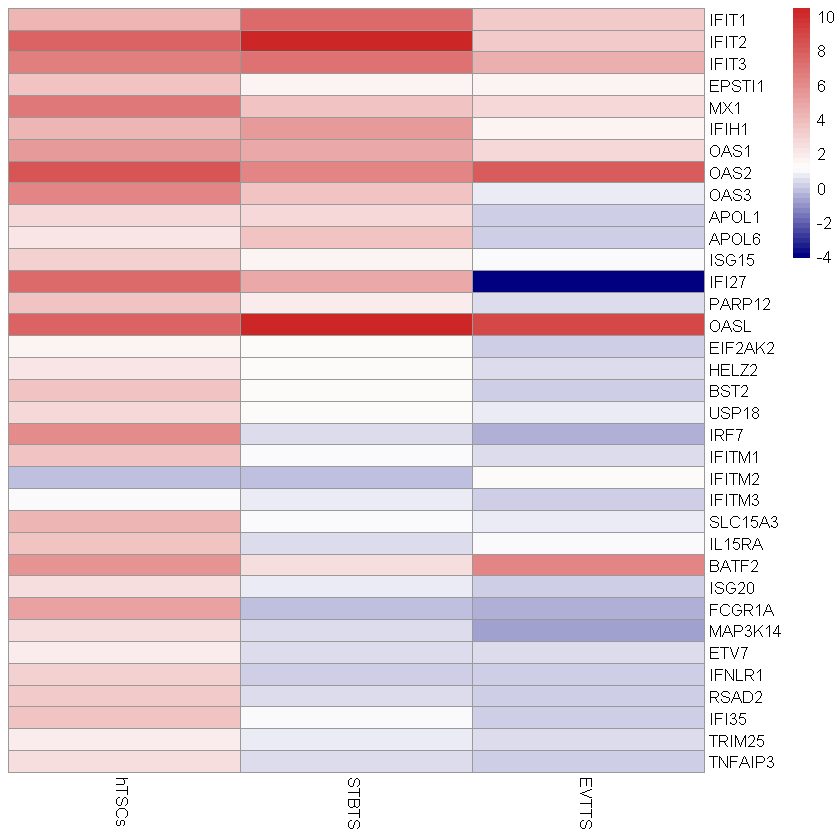

In [15]:
p <- pheatmap(plotfoldChange, scale = 'none',show_rownames = T,cluster_cols = F, cluster_rows = F, color = colorRampPalette(c("Navy", "white", "Firebrick3"),bias = 1.5)(50))

In [16]:
ggsave(filename = 'Figure2F_update.pdf',plot = p,width = 3,height=8)

## Comparision of previous results and current results

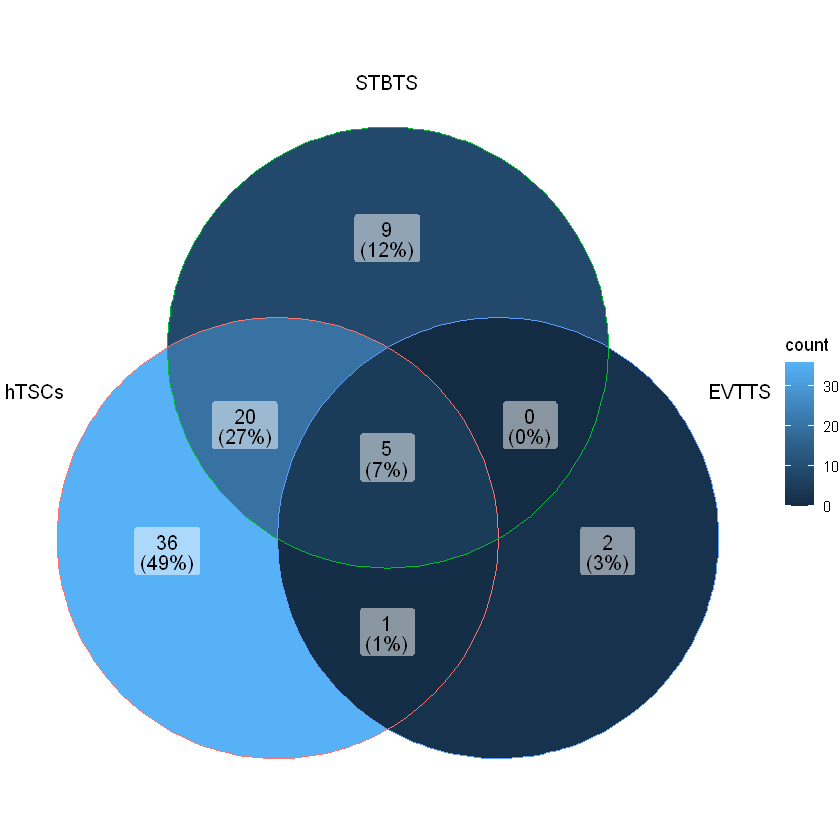

In [17]:
TSgene_pre <- read.csv('TS_foldChange4.csv',header = T)$X
STBgene_pre <- read.csv('STB_foldChange2.csv',header = T)$X
EVTgene_pre <- read.csv('EVT_foldChange2.csv',header = T)$X

plotList_infection_pre <- list("hTSCs"=TSgene_pre,"STBTS"=STBgene_pre,"EVTTS"=EVTgene_pre)
p_pre <- ggVennDiagram(plotList_infection_pre,label = c('both'))
p_pre


In [18]:
intersectAll_infection <- intersect(intersect(TSgene,STBgene),EVTgene)
intersectSTBEVT_infection <- intersect(STBgene,EVTgene)
intersectTSEVT_infection <- intersect(TSgene,EVTgene)
intersectTSSTB_infection <- intersect(TSgene,STBgene)

In [19]:
intersectAll_infection_pre <- intersect(intersect(TSgene_pre,STBgene_pre),EVTgene_pre)
intersectSTBEVT_infection_pre <- intersect(STBgene_pre,EVTgene_pre)
intersectTSEVT_infection_pre <- intersect(TSgene_pre,EVTgene_pre)
intersectTSSTB_infection_pre <- intersect(TSgene_pre,STBgene_pre)

In [20]:
intersectAll_infection

[1] "EPSTI1" "IFIH1"  "IFIT1"  "IFIT2"  "IFIT3"  "MX1"    "OAS1"   "OAS2"  
[9] "OASL"

In [21]:
intersectAll_infection_pre

[1] "IFIT3" "MX1"   "IFIT2" "IFIT1" "IFIH1"

In [22]:
intersectSTBEVT_infection

[1] "EPSTI1" "IFIH1"  "IFIT1"  "IFIT2"  "IFIT3"  "MX1"    "OAS1"   "OAS2"  
[9] "OASL"

In [23]:
intersectSTBEVT_infection_pre

[1] "IFIT2" "IFIH1" "IFIT1" "MX1"   "IFIT3"

In [24]:
intersectTSEVT_infection

[1] "EPSTI1" "IFIH1"  "IFIT1"  "IFIT2"  "IFIT3"  "MX1"    "OAS1"   "OAS2"  
[9] "OASL"

In [25]:
intersectTSEVT_infection_pre

[1] "IFIT3"  "MX1"    "IFIT2"  "IFIT1"  "EPSTI1" "IFIH1"

In [26]:
intersectTSSTB_infection

[1] "APOL1"  "APOL6"  "BST2"   "DDX60"  "DTX3L"  "EPSTI1" "HELZ2"  "IFIH1" 
 [9] "IFIT1"  "IFIT2"  "IFIT3"  "IFITM1" "IRF1"   "ISG15"  "MX1"    "OAS1"  
[17] "OAS2"   "OAS3"   "OASL"   "PARP12" "PLSCR1" "SP110"  "USP18"

In [27]:
intersectTSSTB_infection_pre

[1] "DHX58"   "IFIT3"   "OAS2"    "OASL"    "APOL1"   "IFI27"   "MX1"    
 [8] "OAS3"    "IFIT2"   "DDX60"   "OAS1"    "CCL5"    "IFIT1"   "APOL6"  
[15] "IFITM1"  "PARP12"  "ISG15"   "IFIH1"   "DTX3L"   "HELZ2"   "USP18"  
[22] "STAT1"   "EIF2AK2" "PLSCR1"  "BST2"